In [1]:
# Dataset Splitting
## SYS819 - Autoencoder
### Charbel Nasr - NASC78350101

In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
### Partie 1: Division des données 70% 15% 15%
# Step 1: Load the data
final_data = pd.read_csv("final_data.csv")
print(f"Initial Data: {final_data.shape[0]} rows")

Initial Data: 320771 rows


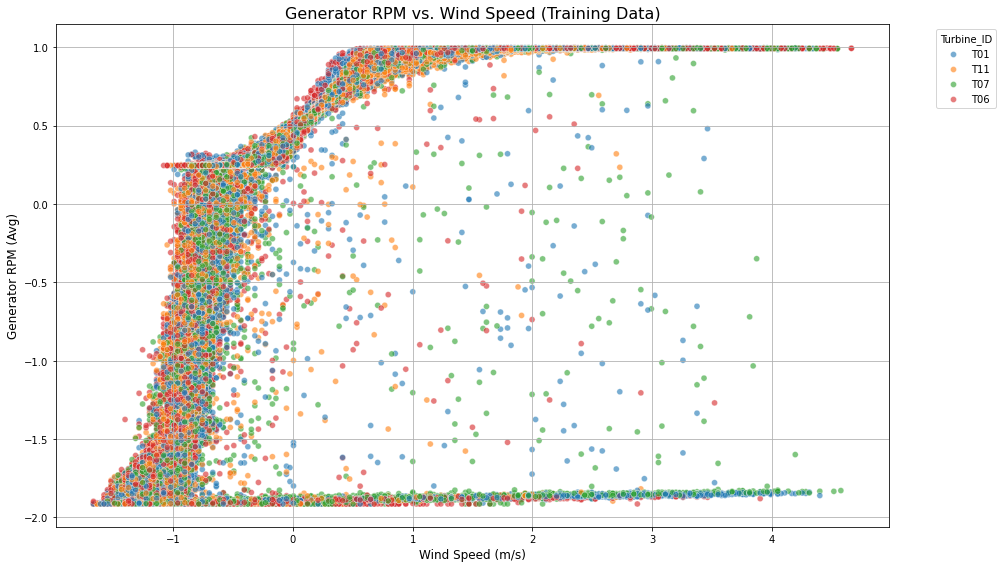

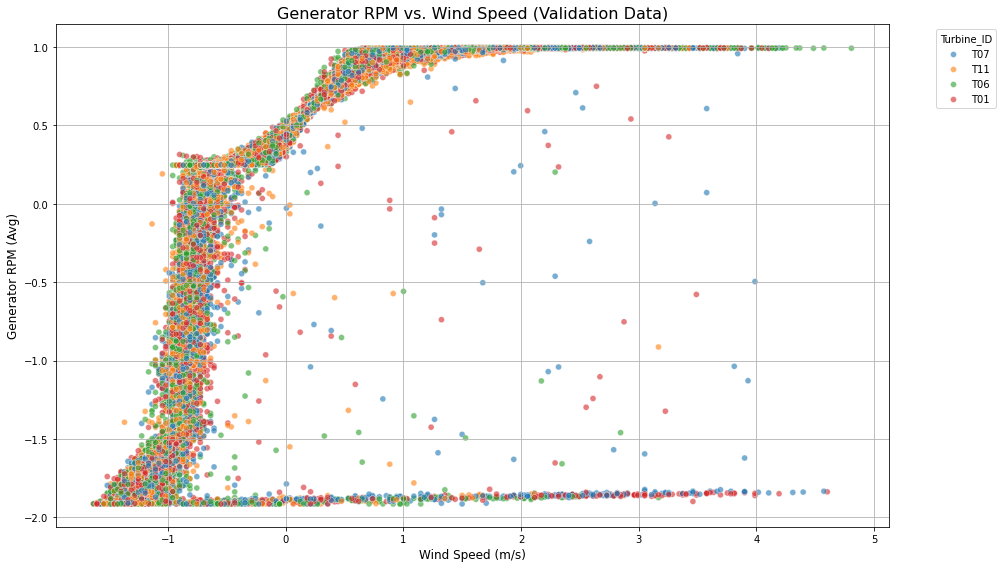

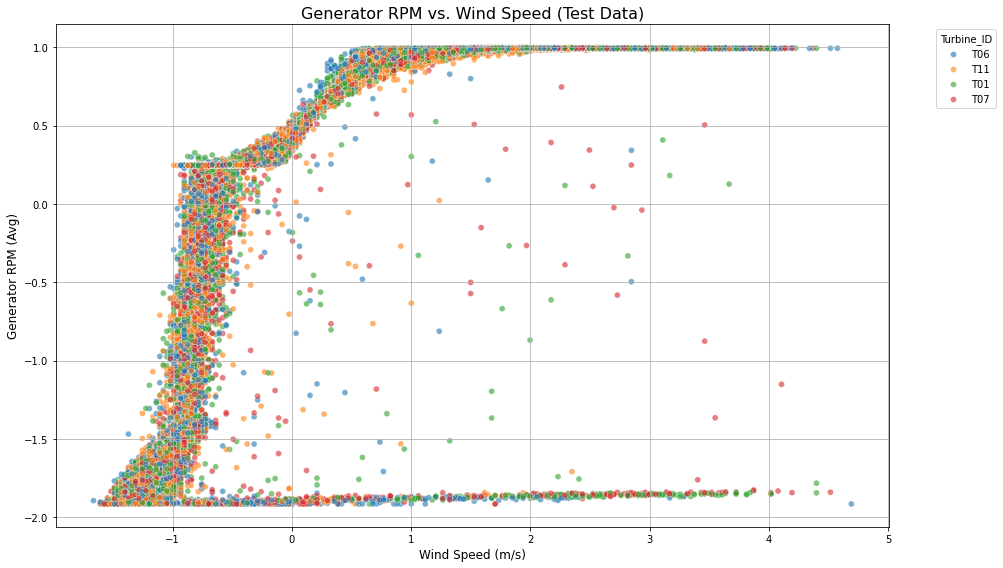

In [4]:

# Step 2: Split the data into three datasets: 70% (training), 15% (validation), 15% (test)
exclude_columns = ['Turbine_ID', 'Timestamp']
features = final_data.drop(columns=exclude_columns).values

# Split into training (70%), validation (15%), and test (15%)
X_train, X_temp, train_indices, temp_indices = train_test_split(
    features, final_data.index, test_size=0.3, random_state=42
)
X_val, X_test, val_indices, test_indices = train_test_split(
    X_temp, temp_indices, test_size=0.5, random_state=42
)

train_data = final_data.iloc[train_indices]
val_data = final_data.iloc[val_indices]
test_data = final_data.iloc[test_indices]

# Step 4: Generate scatter plots for each dataset

def generate_scatter_plot(data, title):
    plt.figure(figsize=(14, 8))
    sns.scatterplot(
        data=data,
        x='Amb_WindSpeed_Avg',       # Average wind speed
        y='Gen_RPM_Avg',             # Average generator RPM
        hue='Turbine_ID',            # Differentiate points based on Turbine_ID
        palette='tab10',             # Use a color palette for unique turbine IDs
        alpha=0.6                    # Transparency for overlapping points
    )
    plt.title(title, fontsize=16)
    plt.xlabel('Wind Speed (m/s)', fontsize=12)
    plt.ylabel('Generator RPM (Avg)', fontsize=12)
    plt.legend(title='Turbine_ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Generate scatter plots for each dataset
generate_scatter_plot(train_data, 'Generator RPM vs. Wind Speed (Training Data)')
generate_scatter_plot(val_data, 'Generator RPM vs. Wind Speed (Validation Data)')
generate_scatter_plot(test_data, 'Generator RPM vs. Wind Speed (Test Data)')


In [5]:
### Partie 2: Marker les anomalies

In [6]:
def mark_anomalies(df):
    df = df.copy()
    df.loc[:, 'Anomaly'] = 0
    conditions = [
        (df['Amb_WindSpeed_Avg'] > -0.5) & (df['Gen_RPM_Avg'] < -1),
        (df['Amb_WindSpeed_Avg'] > -0.25) & (df['Gen_RPM_Avg'] < 0),
        (df['Amb_WindSpeed_Avg'] > 0.25) & (df['Gen_RPM_Avg'] < 0.5),
        (df['Amb_WindSpeed_Avg'] > 1) & (df['Gen_RPM_Avg'] < 0.75)
    ]

    # Mark anomalies as 1 based on the conditions
    for condition in conditions:
        df.loc[condition, 'Anomaly'] = 1

    return df


# Mark anomalies in each dataset
train_data = mark_anomalies(train_data)
val_data = mark_anomalies(val_data)
test_data = mark_anomalies(test_data)

print("Anomalies have been marked and datasets updated.")


Anomalies have been marked and datasets updated.


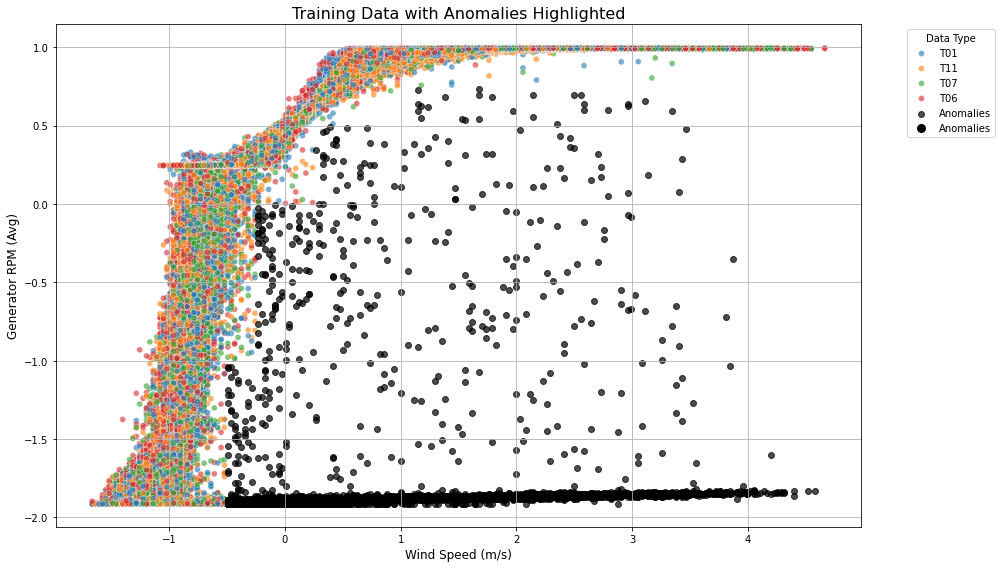

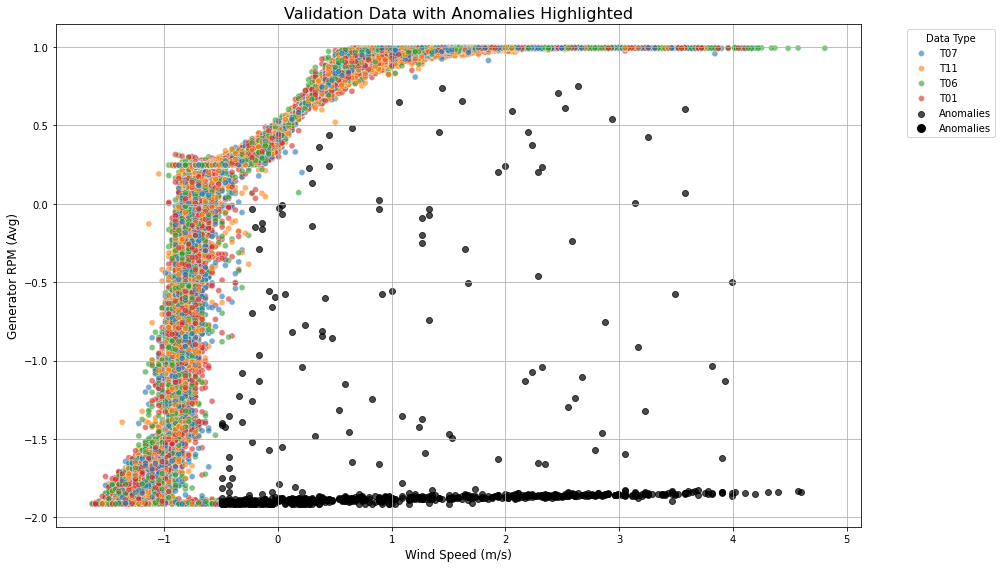

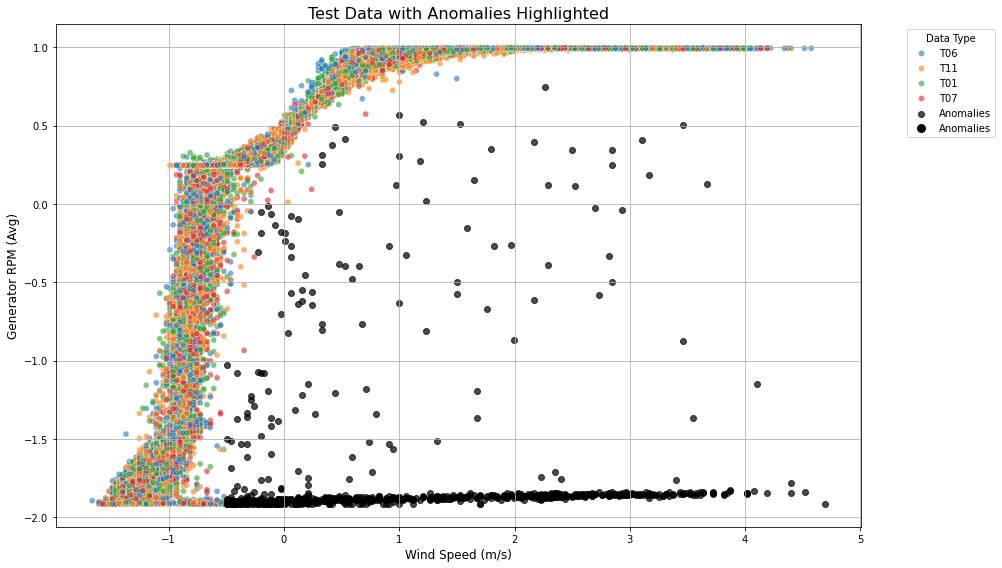

In [7]:
def generate_scatter_plot_with_anomalies(data, title):
    plt.figure(figsize=(14, 8))

    # Plot normal points first
    normal_data = data[data['Anomaly'] == 0]
    sns.scatterplot(
        data=normal_data,
        x='Amb_WindSpeed_Avg',
        y='Gen_RPM_Avg',
        hue='Turbine_ID',
        palette='tab10',
        alpha=0.6
    )

    # Overlay anomalies in black
    anomaly_data = data[data['Anomaly'] == 1]
    plt.scatter(
        anomaly_data['Amb_WindSpeed_Avg'],
        anomaly_data['Gen_RPM_Avg'],
        color='black',
        alpha=0.7,
        label='Anomalies'
    )

    # Custom legend for anomalies
    handles, labels = plt.gca().get_legend_handles_labels()
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='Anomalies'))
    plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', title='Data Type')

    plt.title(title, fontsize=16)
    plt.xlabel('Wind Speed (m/s)', fontsize=12)
    plt.ylabel('Generator RPM (Avg)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Generate scatter plots for training, validation, and test datasets with anomalies highlighted
generate_scatter_plot_with_anomalies(train_data, 'Training Data with Anomalies Highlighted')
generate_scatter_plot_with_anomalies(val_data, 'Validation Data with Anomalies Highlighted')
generate_scatter_plot_with_anomalies(test_data, 'Test Data with Anomalies Highlighted')


In [8]:
### Partie 3: Enlever les anomalies de training data

In [9]:
# Filter normal data for training
train_data_normal = train_data[train_data['Anomaly'] == 0]

# Save the clean training data
train_data_normal.to_csv('train_data.csv', index=False)

# Validation and test sets can retain anomalies for evaluation
val_data.to_csv('val_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


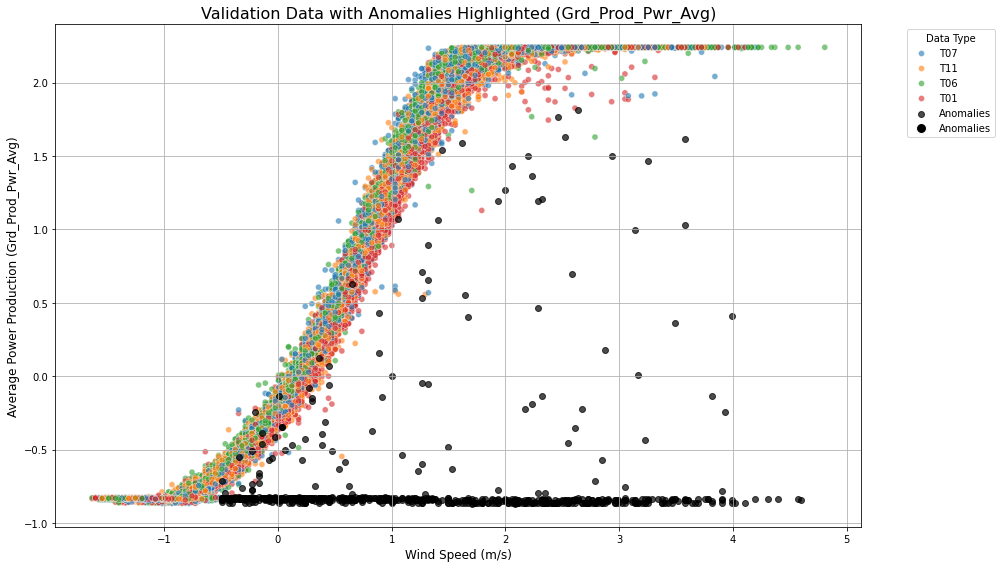

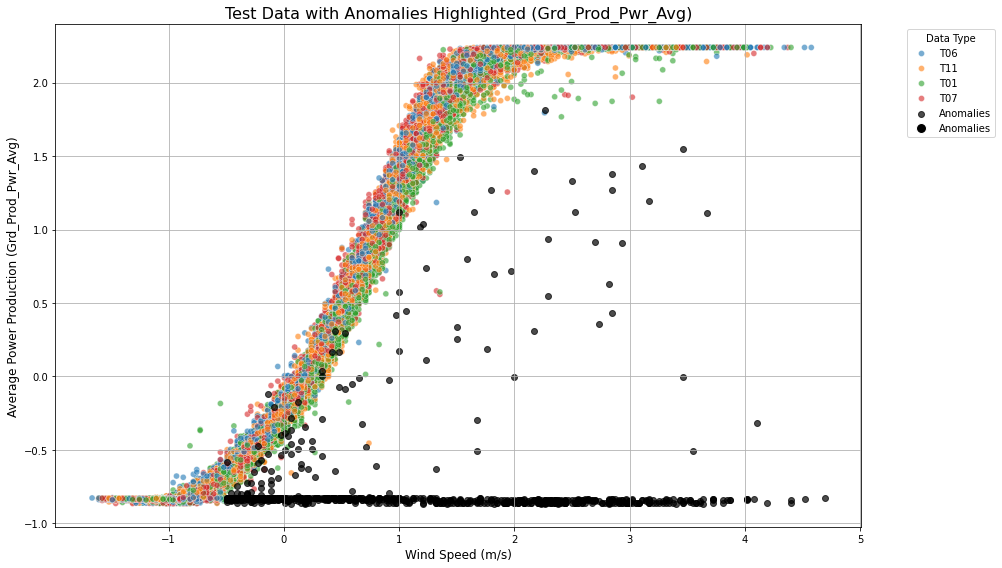

In [10]:
# Updated function to plot with Grd_Prod_Pwr_Avg instead of Gen_RPM_Avg
def generate_scatter_plot_with_anomalies(data, title):
    plt.figure(figsize=(14, 8))

    # Plot normal points first
    normal_data = data[data['Anomaly'] == 0]
    sns.scatterplot(
        data=normal_data,
        x='Amb_WindSpeed_Avg',
        y='Grd_Prod_Pwr_Avg',
        hue='Turbine_ID',
        palette='tab10',
        alpha=0.6
    )
    
    # Overlay anomalies in black
    anomaly_data = data[data['Anomaly'] == 1]
    plt.scatter(
        anomaly_data['Amb_WindSpeed_Avg'],
        anomaly_data['Grd_Prod_Pwr_Avg'],
        color='black',
        alpha=0.7,
        label='Anomalies'
    )

    # Custom legend for anomalies
    handles, labels = plt.gca().get_legend_handles_labels()
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='Anomalies'))
    plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', title='Data Type')

    plt.title(title, fontsize=16)
    plt.xlabel('Wind Speed (m/s)', fontsize=12)
    plt.ylabel('Average Power Production (Grd_Prod_Pwr_Avg)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Generate scatter plots for training, validation, and test datasets with Grd_Prod_Pwr_Avg
generate_scatter_plot_with_anomalies(val_data, 'Validation Data with Anomalies Highlighted (Grd_Prod_Pwr_Avg)')
generate_scatter_plot_with_anomalies(test_data, 'Test Data with Anomalies Highlighted (Grd_Prod_Pwr_Avg)')


In [11]:
### Partie 4: cree data avec isolation forest for second training

In [12]:
from sklearn.ensemble import IsolationForest
import pandas as pd

In [13]:
# Define the features for Isolation Forest (exclude non-numeric columns)
non_numeric_columns = ['Turbine_ID', 'Timestamp']
embedding_columns = [col for col in train_data_normal.columns if col.startswith('Remark_Embedding_')]
exclude_columns = non_numeric_columns + embedding_columns + ['Anomaly']

# Select numeric features for Isolation Forest
features = train_data_normal.drop(columns=exclude_columns)

# Initialize Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.30, random_state=42)
iso_forest.fit(features)

# Predict anomalies (-1 indicates an anomaly, 1 indicates normal)
predictions = iso_forest.predict(features)

# Add the predictions to the DataFrame using .loc
train_data_normal.loc[:, 'IF_Anomaly'] = predictions

# Keep only normal points (exclude Isolation Forest anomalies)
train_data_IF = train_data_normal[train_data_normal['IF_Anomaly'] == 1].drop(columns=['IF_Anomaly'])

# Save the resulting dataset to CSV
train_data_IF.to_csv('train_data_IF.csv', index=False)

print(f"Isolation Forest filtered dataset saved as 'train_data_IF.csv'.")


<ipython-input-13-57dcccc7acd5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_normal.loc[:, 'IF_Anomaly'] = predictions


Isolation Forest filtered dataset saved as 'train_data_IF.csv'.


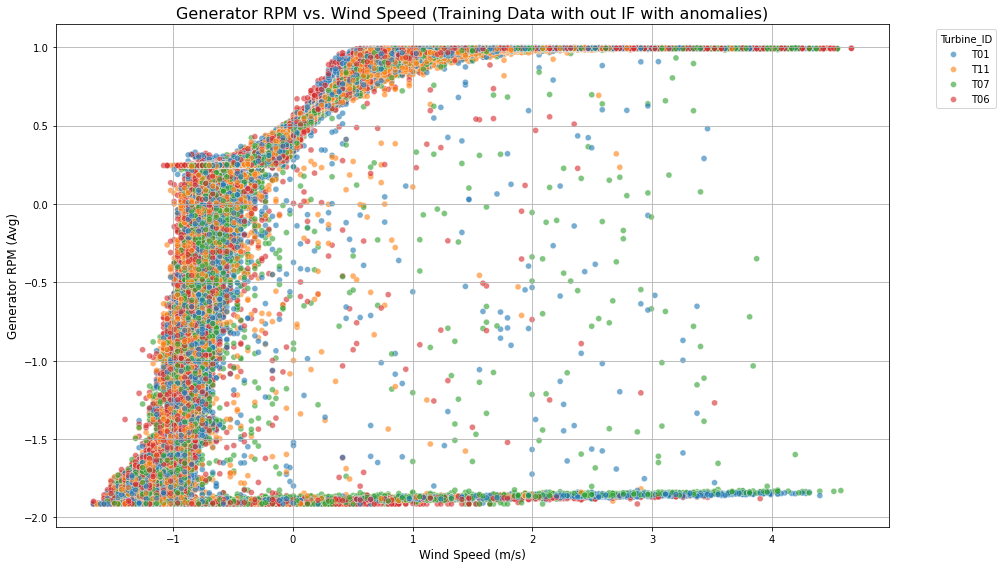

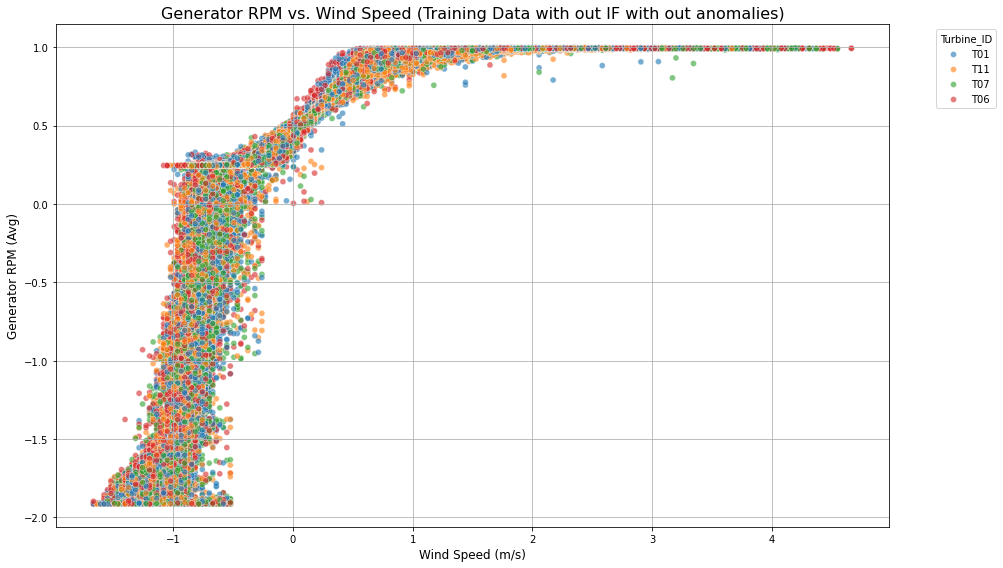

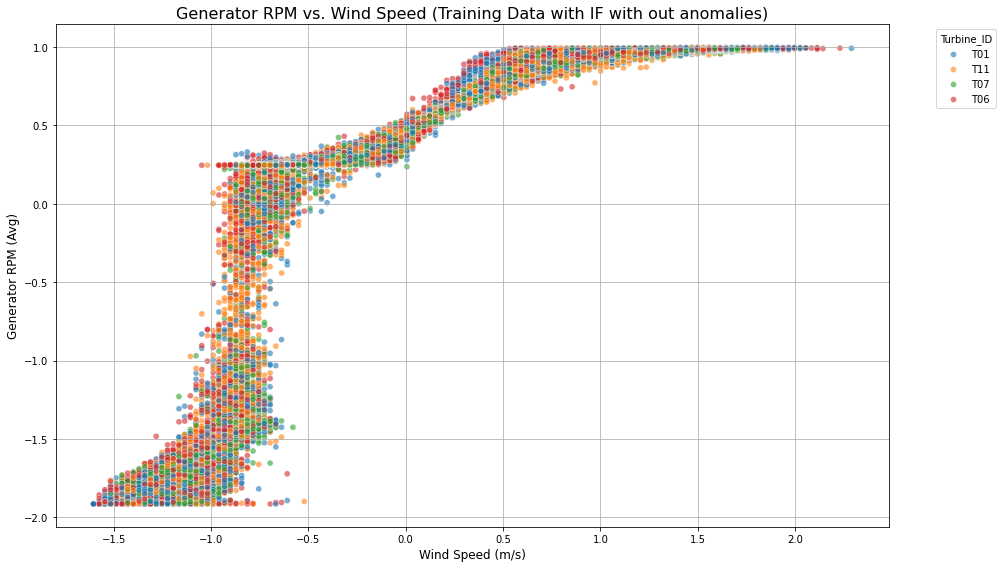

In [14]:
def generate_pwr_scatter_plot(data, title):
    plt.figure(figsize=(14, 8))
    sns.scatterplot(
        data=data,
        x='Amb_WindSpeed_Avg',       # Average wind speed
        y='Grd_Prod_Pwr_Avg',             # Average generator RPM
        hue='Turbine_ID',            # Differentiate points based on Turbine_ID
        palette='tab10',             # Use a color palette for unique turbine IDs
        alpha=0.6                    # Transparency for overlapping points
    )
    plt.title(title, fontsize=16)
    plt.xlabel('Wind Speed (m/s)', fontsize=12)
    plt.ylabel('Grd Prod Pwr Avg', fontsize=12)
    plt.legend(title='Turbine_ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



generate_scatter_plot(train_data, 'Generator RPM vs. Wind Speed (Training Data with out IF with anomalies)')
generate_scatter_plot(train_data_normal, 'Generator RPM vs. Wind Speed (Training Data with out IF with out anomalies)')
generate_scatter_plot(train_data_IF, 'Generator RPM vs. Wind Speed (Training Data with IF with out anomalies)')


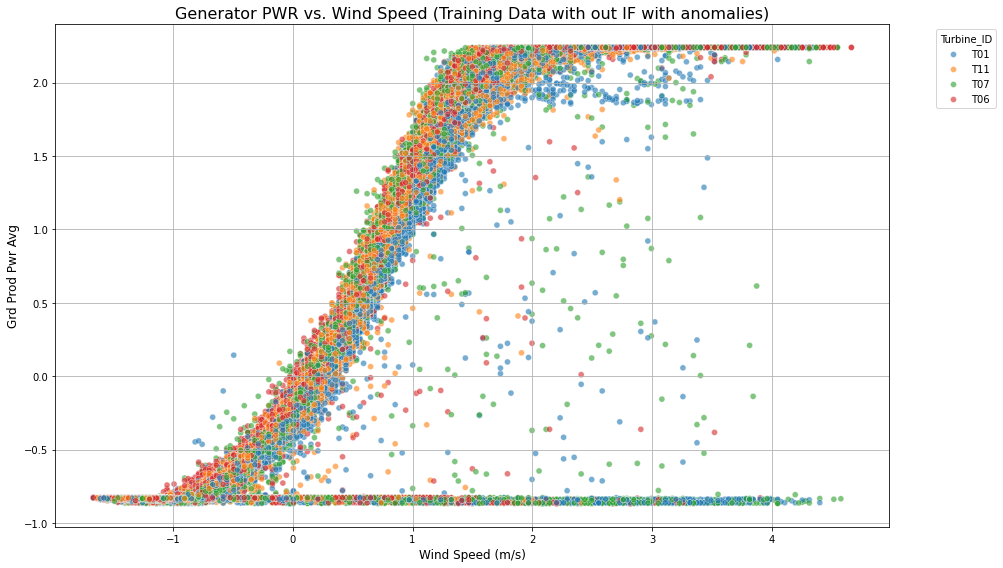

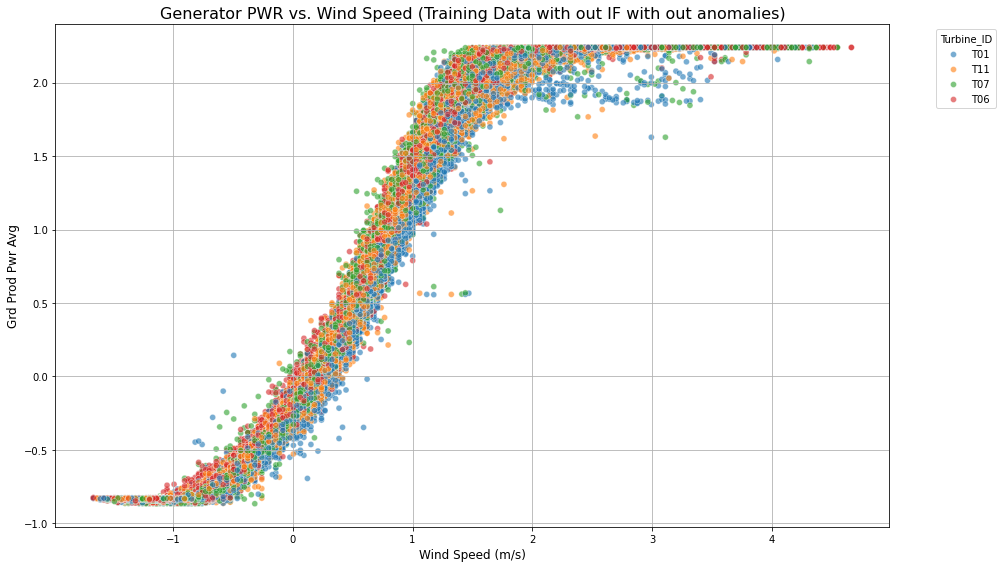

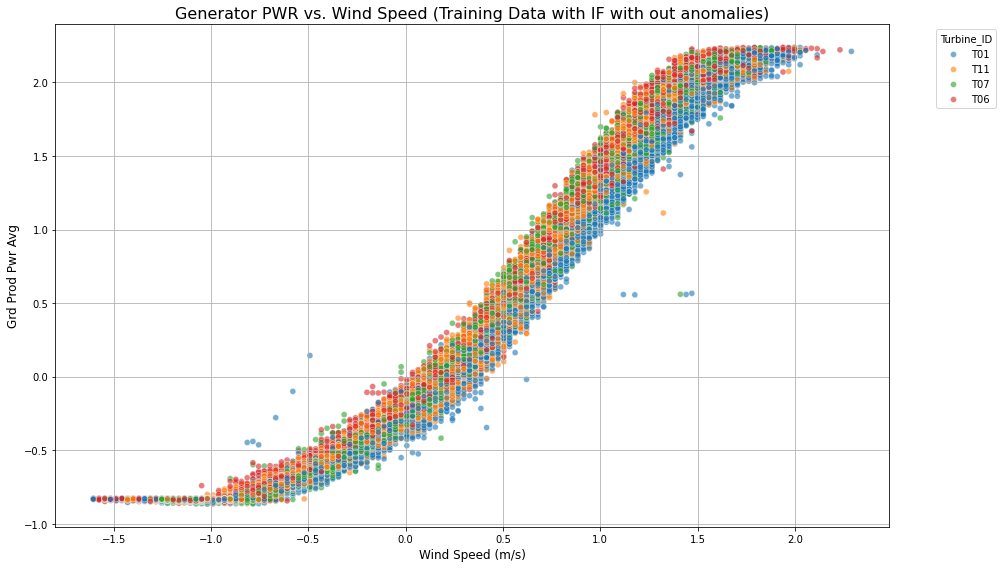

In [15]:
generate_pwr_scatter_plot(train_data, 'Generator PWR vs. Wind Speed (Training Data with out IF with anomalies)')
generate_pwr_scatter_plot(train_data_normal, 'Generator PWR vs. Wind Speed (Training Data with out IF with out anomalies)')
generate_pwr_scatter_plot(train_data_IF, 'Generator PWR vs. Wind Speed (Training Data with IF with out anomalies)')

In [16]:
print(f"Initial Training Data (including anomalies): {train_data.shape[0]} rows")
print(f"Training Data after manual anomaly removal: {train_data_normal.shape[0]} rows")
print(f"Training Data after Isolation Forest filtering: {train_data_IF.shape[0]} rows")

Initial Training Data (including anomalies): 224539 rows
Training Data after manual anomaly removal: 221138 rows
Training Data after Isolation Forest filtering: 154796 rows
